# Regridding the Ocean Color based VGPM/CBPM NPP and Biomass estimates

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import glob

In [37]:
import MITgcm_recipes

In [2]:
%matplotlib inline

## Functions

The original hdf files are not formatted in a suitable way for our use so we need to build several functions to fix this:

In [3]:
def add_lon_lat(ds):
    dlon = 360 / len(ds.fakeDim1)
    dlat = 180 / len(ds.fakeDim0)
    lon = np.arange(-180, 180, dlon)
    lat = np.arange(90, -90, -dlat)
    ds = ds.rename({'fakeDim0':'lat', 'fakeDim1':'lon'})
    ds['lon'] = lon
    ds['lat'] = lat
    return ds

In [4]:
def set_time(ds):
    startdate = pd.Timestamp(ds.attrs['Start Time String'])
    enddate = pd.Timestamp(ds.attrs['Stop Time String'])
    midmonth = (enddate - startdate).total_seconds() / 2
    ds['time'] = startdate + pd.Timedelta(seconds=midmonth)
    ds = ds.expand_dims('time')
    ds = ds.assign_coords(time=ds['time'])
    return ds

In [5]:
def concat_all_files(listfiles):
    firstfile=True

    for hdffile in listfiles:
        tmp = xr.open_dataset(hdffile)
        tmp = set_time(tmp)
        
        if firstfile:
            out = tmp
            firstfile=False
        else:
            out = xr.concat([out, tmp], dim='time')
    return out

In [6]:
def mask_missing_value(ds, spval=-9999.):
    out = ds.where(ds != spval)
    return out

## Creating the corrected datasets

### 1. Eppley-VGPM based on SeaWIFS

In [8]:
dir_eppley_seawifs = '/local/data/artemis/workspace/rdussin/Observations/Eppley-VGPM/eppley_seawifs/'

In [9]:
listfiles_eppley_seawifs = glob.glob(dir_eppley_seawifs + '*.hdf')
listfiles_eppley_seawifs.sort()

In [10]:
data_eppleys = concat_all_files(listfiles_eppley_seawifs)

In [11]:
data_eppleys = add_lon_lat(data_eppleys)

In [12]:
data_eppleys = mask_missing_value(data_eppleys)

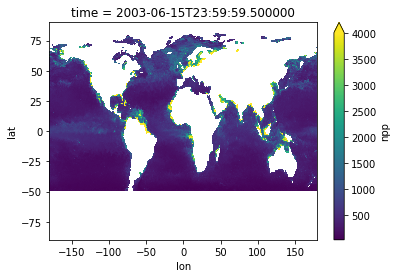

In [13]:
data_eppleys['npp'].sel(time='2003-6').plot(vmax=4000)

In [14]:
data_eppleys.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/Eppley-VGPM/processed/Eppley-VGPM-SeaWIFS.nc', unlimited_dims='time')

### 2. Eppley-VGPM based on MODIS

In [15]:
dir_eppley_modis = '/local/data/artemis/workspace/rdussin/Observations/Eppley-VGPM/eppley_modis/'

In [16]:
listfiles_eppley_modis = glob.glob(dir_eppley_modis + '*.hdf')
listfiles_eppley_modis.sort()

In [17]:
data_eppleym = concat_all_files(listfiles_eppley_modis)

In [18]:
data_eppleym = add_lon_lat(data_eppleym)

In [19]:
data_eppleym = mask_missing_value(data_eppleym)

In [20]:
data_eppleym.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/Eppley-VGPM/processed/Eppley-VGPM-MODIS.nc', unlimited_dims='time')

### 3. Eppley-VGPM based on VIIRS

In [21]:
dir_eppley_viirs = '/local/data/artemis/workspace/rdussin/Observations/Eppley-VGPM/eppley_viirs/'

In [22]:
listfiles_eppley_viirs = glob.glob(dir_eppley_viirs + '*.hdf')
listfiles_eppley_viirs.sort()

In [23]:
data_eppleyv = concat_all_files(listfiles_eppley_viirs)

In [24]:
data_eppleyv = add_lon_lat(data_eppleyv)

In [25]:
data_eppleyv = mask_missing_value(data_eppleyv)

In [26]:
data_eppleyv.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/Eppley-VGPM/processed/Eppley-VGPM-VIIRS.nc', unlimited_dims='time')

### 4. CBPM based on SeaWIFS

In [27]:
dir_cbpm_seawifs = '/local/data/artemis/workspace/rdussin/Observations/CBPM/cbpm_seawifs/'

In [28]:
listfiles_cbpm_seawifs = glob.glob(dir_cbpm_seawifs + '*.hdf')
listfiles_cbpm_seawifs.sort()

data_cbpms = concat_all_files(listfiles_cbpm_seawifs)

data_cbpms = add_lon_lat(data_cbpms)

data_cbpms = mask_missing_value(data_cbpms)

data_cbpms.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-SeaWIFS.nc', unlimited_dims='time')

In [55]:
dir_cbpm_carbon_seawifs = '/local/data/artemis/workspace/rdussin/Observations/CBPM/cbpm_carbon_seawifs/'

In [57]:
listfiles_cbpm_seawifs = glob.glob(dir_cbpm_carbon_seawifs + '*.hdf')
listfiles_cbpm_seawifs.sort()

data_c_cbpms = concat_all_files(listfiles_cbpm_seawifs)

data_c_cbpms = add_lon_lat(data_c_cbpms)

data_c_cbpms = mask_missing_value(data_c_cbpms)

data_c_cbpms.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-Carbon-SeaWIFS.nc', unlimited_dims='time')

### 5. CBPM based on MODIS

In [30]:
dir_cbpm_modis = '/local/data/artemis/workspace/rdussin/Observations/CBPM/cbpm_modis/'

In [31]:
listfiles_cbpm_modis = glob.glob(dir_cbpm_modis + '*.hdf')
listfiles_cbpm_modis.sort()

data_cbpmm = concat_all_files(listfiles_cbpm_modis)

data_cbpmm = add_lon_lat(data_cbpmm)

data_cbpmm = mask_missing_value(data_cbpmm)

data_cbpmm.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-MODIS.nc', unlimited_dims='time')

In [58]:
dir_cbpm_carbon_modis = '/local/data/artemis/workspace/rdussin/Observations/CBPM/cbpm_carbon_modis/'

In [59]:
listfiles_cbpm_modis = glob.glob(dir_cbpm_carbon_modis + '*.hdf')
listfiles_cbpm_modis.sort()

data_c_cbpmm = concat_all_files(listfiles_cbpm_modis)

data_c_cbpmm = add_lon_lat(data_c_cbpmm)

data_c_cbpmm = mask_missing_value(data_c_cbpmm)

data_c_cbpmm.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-Carbon-MODIS.nc', unlimited_dims='time')

### 6. CBPM based on VIIRS

In [32]:
dir_cbpm_viirs = '/local/data/artemis/workspace/rdussin/Observations/CBPM/cbpm_viirs/'

In [33]:
listfiles_cbpm_viirs = glob.glob(dir_cbpm_viirs + '*.hdf')
listfiles_cbpm_viirs.sort()

data_cbpmv = concat_all_files(listfiles_cbpm_viirs)

data_cbpmv = add_lon_lat(data_cbpmv)

data_cbpmv = mask_missing_value(data_cbpmv)

data_cbpmv.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-VIIRS.nc', unlimited_dims='time')

In [60]:
dir_cbpm_carbon_viirs = '/local/data/artemis/workspace/rdussin/Observations/CBPM/cbpm_carbon_viirs/'

In [61]:
listfiles_cbpm_viirs = glob.glob(dir_cbpm_carbon_viirs + '*.hdf')
listfiles_cbpm_viirs.sort()

data_c_cbpmv = concat_all_files(listfiles_cbpm_viirs)

data_c_cbpmv = add_lon_lat(data_c_cbpmv)

data_c_cbpmv = mask_missing_value(data_c_cbpmv)

data_c_cbpmv.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-Carbon-VIIRS.nc', unlimited_dims='time')

## Regridding

In [34]:
file_aste_raw = '/local/data/artemis/workspace/rdussin/ASTE/GRID/nc/aste_grid.nc'
aste_raw = xr.open_dataset(file_aste_raw)

In [41]:
npp_vgpms_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(data_eppleys.sortby(['lat'], ascending=True), aste_raw, ['npp'], 
                                                               method='bilinear',
                                                               lonname='lon', latname='lat', point='T', 
                                                               periodic=True, reuse_weights=False)

Overwrite existing file: regrid_face0.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face1.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face2.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face3.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face4.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face5.nc 
 You can set reuse_weights=True to save computing time.


/home/rdussin/.conda/envs/production2/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


In [42]:
npp_vgpms_aste

<xarray.Dataset>
Dimensions:  (face: 6, i: 270, j: 270, time: 132)
Coordinates:
  * time     (time) datetime64[ns] 1997-10-16T11:59:59.500000 ... 2009-04-15T23:59:59.500000
  * i        (i) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * face     (face) int64 0 1 2 3 4 5
Data variables:
    npp      (face, time, j, i) float64 438.7 438.7 438.7 438.7 ... 0.0 0.0 0.0

In [43]:
npp_vgpms_aste.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/EppleyVGPM-SeaWIFS_ASTE.nc', unlimited_dims='time')

In [44]:
npp_vgpmm_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(data_eppleym.sortby(['lat'], ascending=True), aste_raw, ['npp'], 
                                                               method='bilinear',
                                                               lonname='lon', latname='lat', point='T', 
                                                               periodic=True, reuse_weights=True)

Reuse existing file: regrid_face0.nc
Reuse existing file: regrid_face1.nc
Reuse existing file: regrid_face2.nc
Reuse existing file: regrid_face3.nc
Reuse existing file: regrid_face4.nc
Reuse existing file: regrid_face5.nc


/home/rdussin/.conda/envs/production2/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


In [45]:
npp_vgpmm_aste.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/EppleyVGPM-MODIS_ASTE.nc', unlimited_dims='time')

In [46]:
npp_vgpmv_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(data_eppleyv.sortby(['lat'], ascending=True), aste_raw, ['npp'], 
                                                               method='bilinear',
                                                               lonname='lon', latname='lat', point='T', 
                                                               periodic=True, reuse_weights=True)

Reuse existing file: regrid_face0.nc
Reuse existing file: regrid_face1.nc
Reuse existing file: regrid_face2.nc
Reuse existing file: regrid_face3.nc
Reuse existing file: regrid_face4.nc
Reuse existing file: regrid_face5.nc


/home/rdussin/.conda/envs/production2/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


In [47]:
npp_vgpmv_aste.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/EppleyVGPM-VIIRS_ASTE.nc', unlimited_dims='time')

In [49]:
npp_cbpms_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(data_cbpms.sortby(['lat'], ascending=True), aste_raw, ['npp'], 
                                                               method='bilinear',
                                                               lonname='lon', latname='lat', point='T', 
                                                               periodic=True, reuse_weights=False)

Overwrite existing file: regrid_face0.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face1.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face2.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face3.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face4.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face5.nc 
 You can set reuse_weights=True to save computing time.


/home/rdussin/.conda/envs/production2/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


In [50]:
npp_cbpms_aste.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-SeaWIFS_ASTE.nc', unlimited_dims='time')

In [51]:
npp_cbpmm_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(data_cbpmm.sortby(['lat'], ascending=True), aste_raw, ['npp'], 
                                                               method='bilinear',
                                                               lonname='lon', latname='lat', point='T', 
                                                               periodic=True, reuse_weights=True)

Overwrite existing file: regrid_face0.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face1.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face2.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face3.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face4.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face5.nc 
 You can set reuse_weights=True to save computing time.


/home/rdussin/.conda/envs/production2/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


In [52]:
npp_cbpmm_aste.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-MODIS_ASTE.nc', unlimited_dims='time')

In [53]:
npp_cbpmv_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(data_cbpmv.sortby(['lat'], ascending=True), aste_raw, ['npp'], 
                                                               method='bilinear',
                                                               lonname='lon', latname='lat', point='T', 
                                                               periodic=True, reuse_weights=True)

Reuse existing file: regrid_face0.nc
Reuse existing file: regrid_face1.nc
Reuse existing file: regrid_face2.nc
Reuse existing file: regrid_face3.nc
Reuse existing file: regrid_face4.nc
Reuse existing file: regrid_face5.nc


/home/rdussin/.conda/envs/production2/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


In [54]:
npp_cbpmv_aste.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-VIIRS_ASTE.nc', unlimited_dims='time')

In [62]:
carbon_cbpms_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(data_c_cbpms.sortby(['lat'], ascending=True), aste_raw, ['carbon'], 
                                                               method='bilinear',
                                                               lonname='lon', latname='lat', point='T', 
                                                               periodic=True, reuse_weights=False)

carbon_cbpms_aste.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-Carbon-SeaWIFS_ASTE.nc', unlimited_dims='time')

Overwrite existing file: regrid_face0.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face1.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face2.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face3.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face4.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face5.nc 
 You can set reuse_weights=True to save computing time.


/home/rdussin/.conda/envs/production2/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


In [63]:
carbon_cbpmm_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(data_c_cbpmm.sortby(['lat'], ascending=True), aste_raw, ['carbon'], 
                                                               method='bilinear',
                                                               lonname='lon', latname='lat', point='T', 
                                                               periodic=True, reuse_weights=True)

carbon_cbpmm_aste.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-Carbon-MODIS_ASTE.nc', unlimited_dims='time')

Reuse existing file: regrid_face0.nc
Reuse existing file: regrid_face1.nc
Reuse existing file: regrid_face2.nc
Reuse existing file: regrid_face3.nc
Reuse existing file: regrid_face4.nc
Reuse existing file: regrid_face5.nc


/home/rdussin/.conda/envs/production2/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


In [64]:
carbon_cbpmv_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(data_c_cbpmv.sortby(['lat'], ascending=True), aste_raw, ['carbon'], 
                                                               method='bilinear',
                                                               lonname='lon', latname='lat', point='T', 
                                                               periodic=True, reuse_weights=True)

carbon_cbpmv_aste.to_netcdf('/local/data/artemis/workspace/rdussin/Observations/CBPM/processed/CBPM-Carbon-VIIRS_ASTE.nc', unlimited_dims='time')

Reuse existing file: regrid_face0.nc
Reuse existing file: regrid_face1.nc
Reuse existing file: regrid_face2.nc
Reuse existing file: regrid_face3.nc
Reuse existing file: regrid_face4.nc
Reuse existing file: regrid_face5.nc


/home/rdussin/.conda/envs/production2/lib/python3.6/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "
